In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# base de dados fictícia

In [10]:
num_clients = 200
np.random.seed(42)
data = pd.DataFrame({
    'Satisfação Atendimento': np.random.randint(1, 6, num_clients),
    'Facilidade Resolução': np.random.randint(1, 6, num_clients),
    'Tempo Resposta': np.random.randint(1, 6, num_clients),
    'Qualidade Solução': np.random.randint(1, 6, num_clients),
    'NPS': np.random.randint(1, 6, num_clients)
})
data

,Satisfação Atendimento,Facilidade Resolução,Tempo Resposta,Qualidade Solução,NPS
0,4,2,3,3,3
1,5,3,5,4,3
2,3,1,1,5,4
3,5,1,5,4,5
4,5,4,4,3,2
...,...,...,...,...,...
195,3,5,5,2,2
196,3,5,5,5,1
197,1,3,5,2,1
198,5,4,5,3,4


# Análise exploratória

In [11]:
data.describe()

,Satisfação Atendimento,Facilidade Resolução,Tempo Resposta,Qualidade Solução,NPS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.000000,2.920000,3.135000,2.945000,3.020000
std,1.417762,1.411938,1.479092,1.449996,1.410513
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


# Método do cotovelo

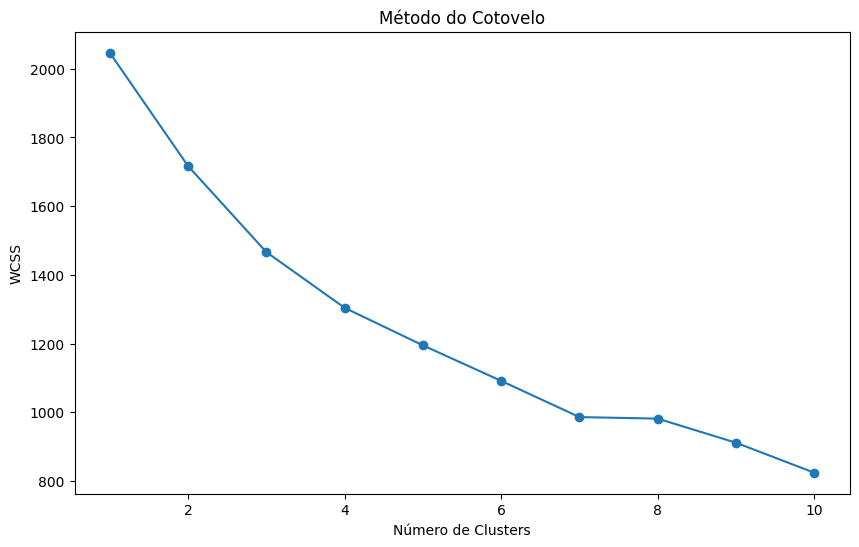

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:

# Aplicar K-means com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)
kmeans

KMeans(n_clusters=3, random_state=42)

# Visualizar os clusters

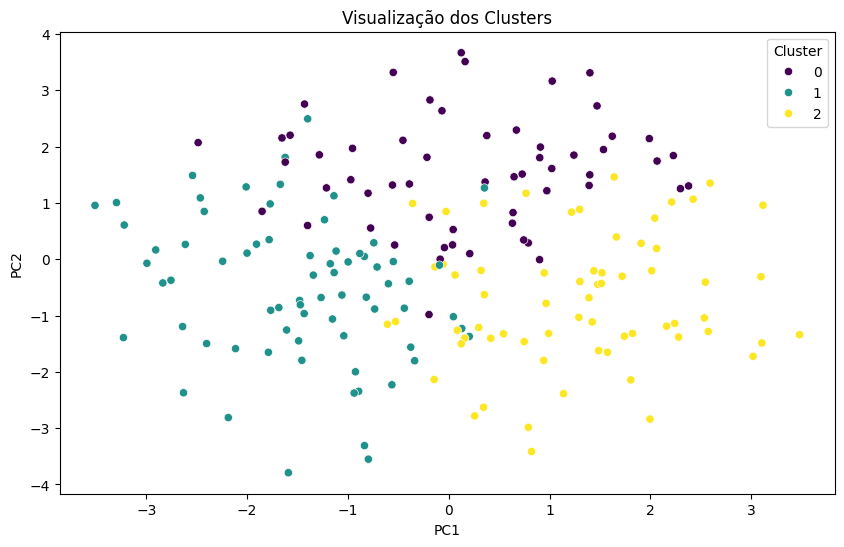

In [14]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.drop('Cluster', axis=1))
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Visualização dos Clusters')
plt.show()

In [15]:
# 6. Analisar perfis dos clusters
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

         Satisfação Atendimento  Facilidade Resolução  Tempo Resposta  \
Cluster                                                                 
0                      3.482759              3.517241        4.034483   
1                      2.722222              2.777778        1.500000   
2                      2.885714              2.571429        4.071429   

         Qualidade Solução       NPS       PC1       PC2  
Cluster                                                   
0                 3.344828  1.706897  0.211120  1.523429  
1                 2.875000  2.847222 -1.459293 -0.532090  
2                 2.685714  4.285714  1.326059 -0.714977  
